### Read and show

In [4]:
import os
import rasterio as rio
from pyrsimg import imgShow, imsShow
from pyrsimg import add_scale_bar, add_north_arrow
import matplotlib.pyplot as plt
from cartopy import crs as ccrs

In [5]:
root_path = os.getcwd().split('pyrsimg')[0] + 'pyrsimg'
path_rsimg = root_path + '/docs/source/examples/data/l8_scene_05.tif'


#### 1. Read the remote sensing image.

In [6]:
rsimg_rio = rio.open(path_rsimg)
rsimg_arr = rsimg_rio.read().transpose(1, 2, 0)  # Transpose to (height, width, bands)
extent_rsimg = [rsimg_rio.bounds.left, rsimg_rio.bounds.right,
                rsimg_rio.bounds.bottom, rsimg_rio.bounds.top]
extent_rsimg


[358155.0, 408855.0, 1673985.0, 1716285.0]

#### 2.Show the single image.

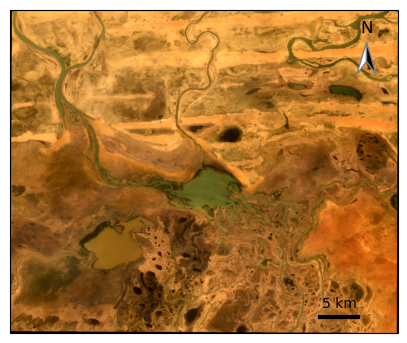

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(5,5), subplot_kw={'projection': ccrs.Mercator()})
ax_img = imgShow(img=rsimg_arr, ax=ax, extent=extent_rsimg)
add_scale_bar(ax=ax, length=5, loc=(0.85, 0.05), crs=ccrs.Mercator())
add_north_arrow(ax=ax, loc=(0.92, 0.85), size=[0.05, 0.05], N_label=True)


#### 3. Show multiple images.

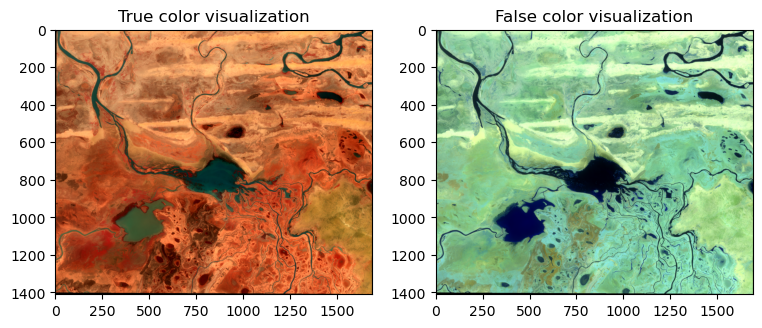

In [8]:
img_list= [rsimg_arr, rsimg_arr]
img_name_list = ['True color visualization', 'False color visualization']
clip_list = [2,2]
col_bands_list = [(3,2,1),(5,4,3)]
fig, axs = plt.subplots(1, 2, figsize=(9, 4))
axs = imsShow(img_list=img_list, axs=axs, img_name_list=img_name_list, 
              clip_list=clip_list, color_bands_list=col_bands_list, axis_ticks=True)

